<a href="https://colab.research.google.com/github/jbarribal/Sentiment-Analysis/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-Processing**

In [ ]:
import pandas as pd
import nltk                                   # library used for NLP
import re                                     # regular expression
import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud
from nltk.corpus import stopwords             # method used to identify stopwords
from nltk.tokenize import word_tokenize       # Splitting a phrase, sentence, or paragraphs to smaller units
from collections import Counter               # counter for the frequency of words
nltk.download('stopwords')                    # Download stopwords
nltk.download('punkt')                        # Download for tokenization
nltk.download('words')                        # Download words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
url = 'https://drive.google.com/file/d/1wyI9qzsWP2GUGcpsj2_nVX_cAf1XLbH8/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data = data.iloc[:, 1]
data

0     Yes, because nowadays you can see how improvin...
1     Yes. Because of the population using different...
2     Yes, the speed, reliability and quality of int...
3                  not really. connection is still bad 
4     Yes, cause providers already came up with fast...
5                Yes because it is faster and unlimited
6     Yes, because the service quality in the last 5...
7     Yes, but it is slow progress. the internet is ...
8     Yes although the new adjustments is not strong...
9     Not really only the pricelists are being updat...
10    It didnt change that much but its slowly getti...
11    Yes, because the internet speeds these past fe...
12                    Yes, it became cheaper and faster
13    Yes, but they could be better in terms of thei...
14    Yes, unlike before internet was slow. Internet...
15    Yes. As compared to dial up connection before,...
16    No. It's still the same, there are days where ...
17                        Yes, the connection is

In [ ]:
# Identify stopwords
ensw = stopwords.words('english')
print(ensw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
textArray = word_tokenize(data[1])
print(textArray)

['Yes', '.', 'Because', 'of', 'the', 'population', 'using', 'different', 'kinds', 'of', 'devices', 'and', 'company', 'that', 'are', 'growing', 'needs', 'faster', 'internet', 'to', 'provide', 'quality', 'and', 'reliable', 'services', '.', 'That', "'s", 'why', 'internet', 'providers', 'is', 'upgrading', 'its', 'internet', 'speed', 'every', 'year', '.']


In [ ]:
# Remove Stopwords
filterArray = [item for item in textArray if item not in ensw]
print(filterArray)

['Yes', '.', 'Because', 'population', 'using', 'different', 'kinds', 'devices', 'company', 'growing', 'needs', 'faster', 'internet', 'provide', 'quality', 'reliable', 'services', '.', 'That', "'s", 'internet', 'providers', 'upgrading', 'internet', 'speed', 'every', 'year', '.']


In [ ]:
# Convert the filterArray to String
stringFilter = ','.join(filterArray)
print(stringFilter)

Yes,.,Because,population,using,different,kinds,devices,company,growing,needs,faster,internet,provide,quality,reliable,services,.,That,'s,internet,providers,upgrading,internet,speed,every,year,.


In [ ]:
# Clean filtered data by getting words with meaning
words = set(nltk.corpus.words.words()) # all the valid english words in NLTK library


In [ ]:
stringString = re.sub('\W+','\n',stringFilter)  # find all the valid english words from the dataset

f = open ('newList.txt', "w") # create a new text file (Write)
f.write(stringString) # write the filtered english words into the text file
f.close()

In [ ]:
# Create function that will check if each word is valid in the NLTK words, if not REMOVE
with open ('newList.txt') as fp:
    line = fp.readline()
    cnt = 1
    f = open('finalList.txt', "w")
    while line:
        data = line.strip()
        if data in words:
            print(data)
            f.write(data + "\n")
        line = fp.readline()
        cnt += 1

population
different
company
growing
needs
faster
provide
quality
reliable
s
speed
every
year


In [ ]:
finalText = open('finalList.txt', "r")
finalData = finalText.read()

tokenwords = word_tokenize(finalData)
countWords = Counter(tokenwords)
print(finalData)

population
different
company
growing
needs
faster
provide
quality
reliable
s
speed
every
year


In [ ]:
#Count the frequency of each word
countList = list(Counter((countWords)).items())
newList = '\n'.join([str(i) for i in countList])
print(newList)

('population', 1)
('different', 1)
('company', 1)
('growing', 1)
('needs', 1)
('faster', 1)
('provide', 1)
('quality', 1)
('reliable', 1)
('s', 1)
('speed', 1)
('every', 1)
('year', 1)


In [ ]:
#Convert to spreadhseet
finalData = re.sub("[)!@''$(.#]","", newList)
f = open('Word_Frequency.csv', "w")
f.write(finalData)
f.close()

# **Word Cloud**

In [ ]:
text = open('Word_Frequency.csv',"r")
data = text.read()

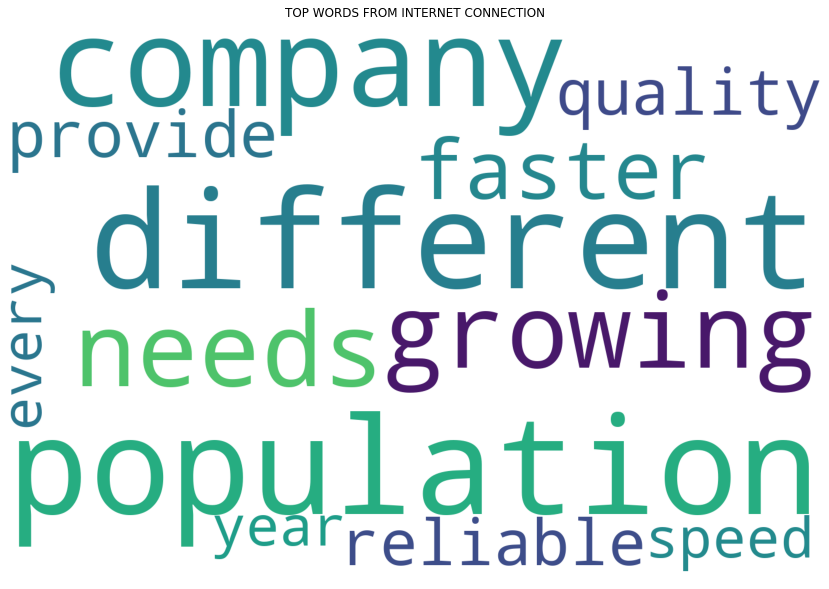

In [ ]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white',mode='RGB',width=1500,height=1000).generate(data)
plt.title("TOP WORDS FROM INTERNET CONNECTION\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
text = open('responses.csv',"r")
data = text.read()

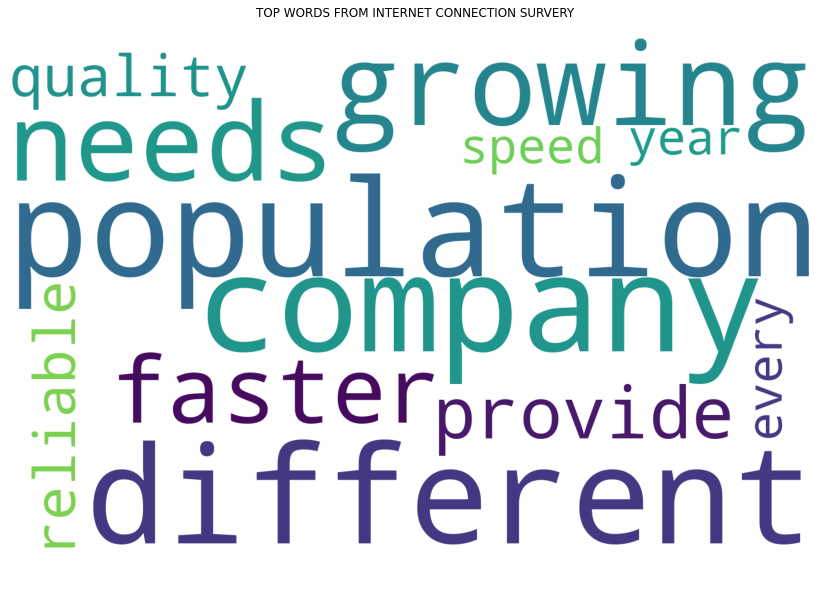

In [ ]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white',mode='RGB',width=1500,height=1000).generate(data)
plt.title("TOP WORDS FROM INTERNET CONNECTION SURVERY\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()